# Tutorial 4.3: Two-Compartment Model of Intrinsically Bursting Neuron

## Neuroscience goal:
- understand how two compartments affect each other and how bursting neurons respond to applied current

## Computational goal:
- gain further familiarity with function calls

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. save files from PR_soma_gating.m and PR_dend_gating.m
- rewriting the functions in python below instead

In [4]:
def dend_gating(v_dend, ca):
    """
    Returns rate constants for dendritic gating variables of Pinsky-Rinzel model
    Function of dendritic membrane potential and dendritic calcium concentration

    Parameters
    ----------
    v_dend : np.array
        Dendritic membrane potential
    ca : np.array
        Dendritic calcium concentration

    Returns
    -------
    alpha_mca : np.array
        Calcium activation rate constant
    beta_mca : np.array
        Calcium deactivation rate constant
    alpha_kca : np.array
        Calcium-dependent potassium activation rate constant
    beta_kca : np.array
        Calcium-dependent potassium deactivation rate constant
    alpha_kahp : np.array
        After-hyperpolarizatoin activation rate constant
    beta_kahp : np.array
        After-hyperpolarization deactivation rate constant
    """
    
    alpha_mca = 1600 /  (1 + np.exp(-72 * (v_dend - 0.005)))

    beta_mca = np.where(
        v_dend == -0.0089,
        20 / 0.2,
        20e3 * (v_dend + 0.0089) / (np.exp(200 * (v_dend + 0.0089)) - 1)
    )

    alpha_kca_1 = 2e3 * np.exp(-(0.0535 + v_dend) / 0.027) * (v_dend > -0.010)
    alpha_kca_2 = np.exp((v_dend + 0.050) / 0.011 - (v_dend + 0.0535) / 0.027) / 0.018975 * (v_dend <= -0.010)
    alpha_kca = alpha_kca_1 + alpha_kca_2

    beta_kca = np.where(
        v_dend <= -0.010, 
        (2e3 * np.exp(-(0.0535 + v_dend) / 0.027) - alpha_kca),
        0
    )
    
    alpha_kahp = np.minimum(20, 20e3 * ca)

    beta_kahp = 4 * np.ones_like(alpha_kahp)

    return alpha_mca, beta_mca, alpha_kca, beta_kca, alpha_kahp, beta_kahp

In [5]:
def soma_gating(v_soma):
    """
    Returns rate constants for somatic gating variables of Pinsky-Rinzel model
    Function of somatic membrane potential

    Parameters
    ----------
    v_soma : np.array
        Somatic membrane potential
    
    Returns
    -------
    alpha_m : np.array
        Sodium activation rate constant
    beta_m : np.array
        Sodium deactivation rate constant
    alpha_h : np.array
        Sodium inactivation rate constant
    beta_h : np.array
        Sodium deinactivation rate constant
    alpha_n : np.array
        Potassium activation rate constant
    beta_n : np.array
        Potassium deactivation rate constant
    """

    alpha_m = np.where(v_soma == -0.0468, 320 / 0.25,
                       320e3 * (v_soma + 0.0469) / (1 - np.exp(-250 * (v_soma + 0.0469))))
    
    beta_m = np.where(v_soma == -0.0199, 280 / 0.2,
                      280e3 * (v_soma + 0.0199) / (np.exp(200 * (v_soma + 0.0199)) - 1))

    alpha_h = 128 * np.exp(-(v_soma + 0.043) / 0.018)
    beta_h = 4e3 / (1 + np.exp(-200 * (v_soma + 0.020)))

    alpha_n = np.where(v_soma == -0.0249, 16 / 0.2,
                       16e3 * (v_soma + 0.0249) / (1 - np.exp(-200 * (v_soma + 0.0249))))
    beta_n = 250 * np.exp(-25 * (v_soma + 0.040))

    return alpha_m, beta_m, alpha_h, beta_h, alpha_n, beta_n

## 2. Plot membrane potential and calcium concentration 
- generate a vector of values for membrane potential (between -0.085 and 0.050 V)
- generate a vector of values for calcium concentration (between 0 and 2e-3 M)
- plot all twelve rate constants for gating variables on a suitable number of figures

In [14]:
vm_values = np.linspace(-85e-3, 50e-3, 20)
ca_values = np.linspace(0, 2e-3, 20)

In [15]:
alpha_mca, beta_mca, alpha_kca, beta_kca, alpha_kahp, beta_kahp = dend_gating(vm_values, ca_values)
alpha_m, beta_m, alpha_h, beta_h, alpha_n, beta_n = soma_gating(vm_values)

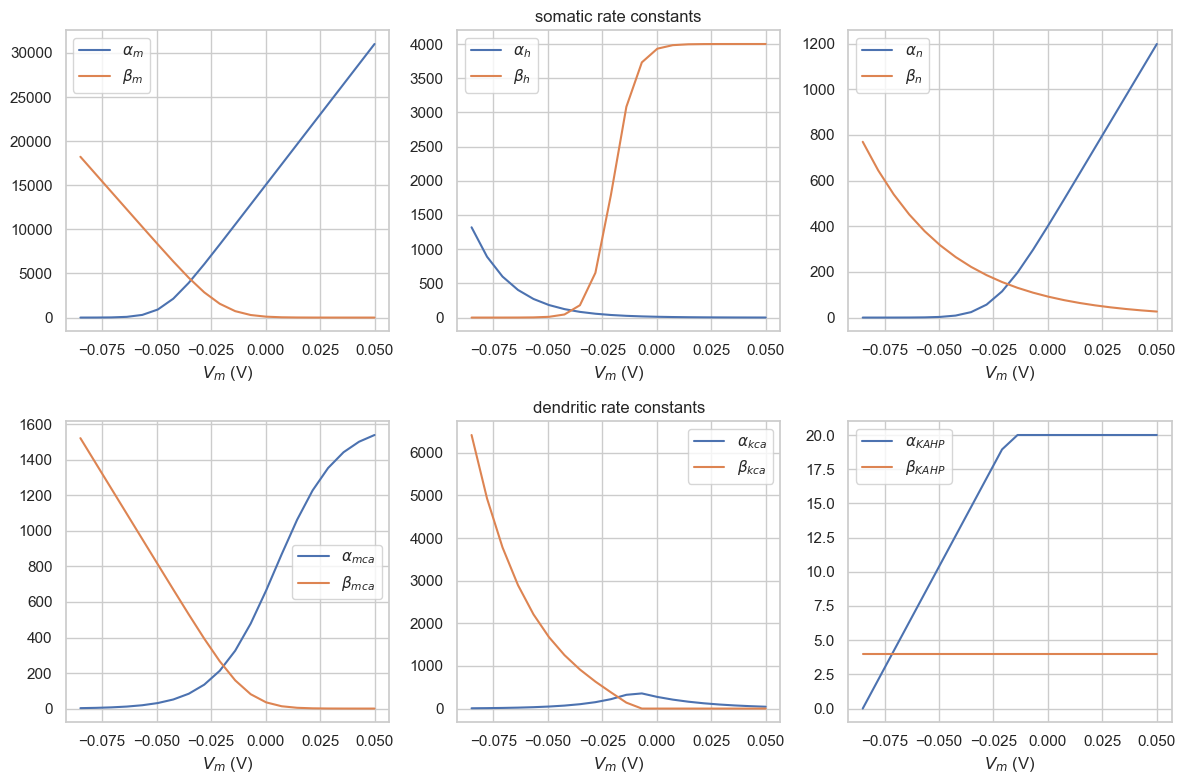

In [22]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

soma_data = [(alpha_m, beta_m, '$\\alpha_m$', '$\\beta_m$'),
             (alpha_h, beta_h, '$\\alpha_h$', '$\\beta_h$'),
             (alpha_n, beta_n, '$\\alpha_n$', '$\\beta_n$')]

soma_data = [(alpha_mca, beta_mca, '$\\alpha_{mca}$', '$\\beta_{mca}$'),
             (alpha_kca, beta_kca, '$\\alpha_{kca}$', '$\\beta_{kca}$'),
             (alpha_kahp, beta_kahp, '$\\alpha_{KAHP}$', '$\\beta_{KAHP}$')]

# somatic
for i, (alpha, beta, label_alpha, label_beta) in enumerate(data_soma):
    ax[0, i].plot(vm_values, alpha, label=label_alpha)
    ax[0, i].plot(vm_values, beta, label=label_beta)
    ax[0, i].set_xlabel('$V_m$ (V)')
    
# dendritic
for i, (alpha, beta, label_alpha, label_beta) in enumerate(data_dend):
    ax[1, i].plot(vm_values, alpha, label=label_alpha)
    ax[1, i].plot(vm_values, beta, label=label_beta)
    ax[1, i].set_xlabel('$V_m$ (V)')

# titles
ax[0, 1].set_title('somatic rate constants')
ax[1, 1].set_title('dendritic rate constants')

# legends
for row in ax:
    for col in row:
        col.legend()

plt.tight_layout()
